In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4

## Task 1 (5+5+5+5+5=25 pts)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

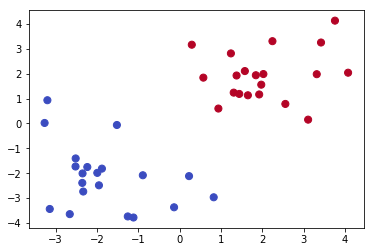

In [2]:
# Data
data1=pd.read_csv('HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

In [3]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=100000)
clf.fit(X,Y)

SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### a. Report the separating hyperplane (line).

Text(0.5, 1.0, 'hyperplane')

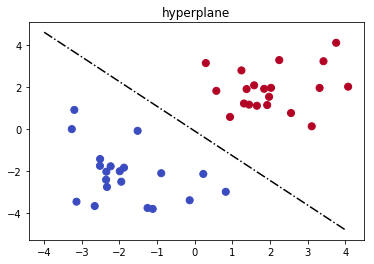

In [4]:
x1 = np.linspace(-4,4)
x2 = -((clf.coef_[0][0]/clf.coef_[0][1])*x1 + clf.intercept_[0]/clf.coef_[0][1])
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.plot(x1,x2, 'k-.')
plt.title('hyperplane')

#### b. List the support vectors.

In [5]:
clf.support_vectors_

array([[ 0.22627536, -2.11810965],
       [-1.5180363 , -0.06399383],
       [ 0.93564585,  0.5969359 ]])

#### c. Calculate the upper and lower hyperplanes (lines) of the margin.

Text(0.5, 1.0, 'hyperplane and support vectors')

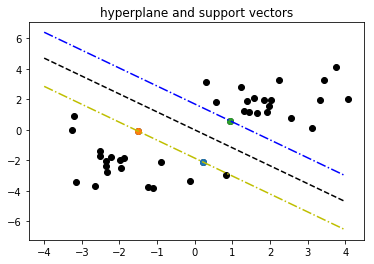

In [6]:
# your code here
plt.scatter(X.iloc[:,0], X.iloc[:,1], c='k')

for point in clf.support_vectors_:
    plt.scatter(point[0], point[1])

k = -(clf.coef_[0][0]/clf.coef_[0][1])
b_1 = clf.support_vectors_[0][1] - k*clf.support_vectors_[0][0]
b_2 = clf.support_vectors_[2][1] - k*clf.support_vectors_[2][0]
x1 = np.linspace(-4,4)

plt.plot(x1, k*x1+b_1, 'y-.')
plt.plot(x1, k*x1+b_2, 'b-.')
plt.plot(x1, k*x1, 'k--')

plt.title('hyperplane and support vectors')

In [7]:
print('lower hyperplane: %fx1-x2+%f'%(k,b_1))
print('lower hyperplane: %fx1-x2+%f'%(k,b_2))

lower hyperplane: -1.176893x1-x2+-1.851808
lower hyperplane: -1.176893x1-x2+1.698091


#### d. Compute the width of the margin.

In [8]:
# your code here
margin = abs(b_1-b_2)/np.sqrt(k**2+1)
print('The margin between upper and lower hyperplanes is', margin)

The margin between upper and lower hyperplanes is 2.2986070079527545


#### e. What would you expect to happen to the margin if the constant C was made very small?

C is the penalty parameter for errors, when C decrease, we care less about error, the only goal is maximizing the margin. Thus, the margin will be greater.

## Task 2 (4+8+8=20 pts)

### Given the dataset provided below, answer the following two questions:

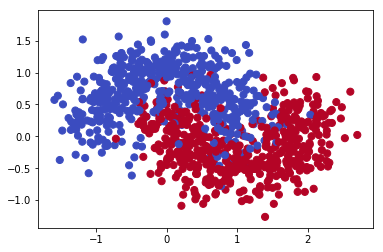

In [9]:
# Data 
data2=pd.read_csv('HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

In [18]:
# your code here
clf = svm.SVC(kernel='poly')
clf.fit(X_train, Y_train)
print('in sample accuracy,',(clf.predict(X_train)==Y_train).sum()/len(Y_train))
print('out of sample accuracy,',(clf.predict(X_test)==Y_test).sum()/len(Y_test))

in sample accuracy, 0.8134328358208955
out of sample accuracy, 0.8272727272727273


/Users/hemingyi/anaconda2/envs/py36/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Next we will use the validation subset in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree.


In [41]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

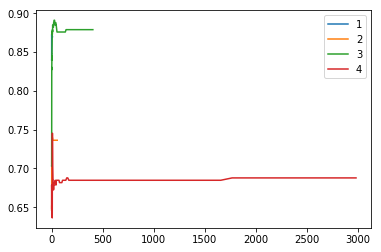

In [42]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

for i in [1,2,3,4]:
    OS = []
    for c in [np.exp(np.linspace(-5,2*i,200))][0]:
        
        clf = svm.SVC(kernel='poly', degree= i, C=c)
        clf.fit(X_train, Y_train)
        OS.append((clf.predict(X_test)==Y_test).sum()/len(Y_test))
    plt.plot([np.exp(np.linspace(-5,2*i,200))][0], OS, label=i)
    plt.legend()

### c. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected. 

In [48]:
# your code here
param_grid = {'kernel':['poly'],
            'C':[np.exp(np.linspace(-5,6,200))][0]}
clf = svm.SVC()
gr = GridSearchCV(clf,param_grid=param_grid)
rs = gr.fit(X_train, Y_train)
print (rs.best_estimator_)

SVC(C=19.294093156027234, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [49]:
clf = svm.SVC(C=19.294093156027234, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
clf.fit(X_train,Y_train)
print('out of sample accuracy', (clf.predict(X_test)==Y_test).sum()/len(Y_test))

out of sample accuracy 0.8878787878787879


## Task 3 (5+5=10pts).

### This task is to be done by hand rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,no

SUV,red,domestic,no

SUV,red,imported,yes

SUV,yellow,imported,no

SUV,yellow,imported,yes

SUV,yellow,domestic,no

sports,yellow,imported,no

sports,red,imported,yes


### a) Calculate the following sample probabilities:

P(Yes) = 6/11

P(No) = 5/11

P(Red|Yes) = 5/6

P(SUV|Yes) = 2/6

P(Domestic|Yes) = 3/6

P(Red|No) = 2/5

P(SUV|No) = 3/5

P(Domestic|No) = 3/5

### b) Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen? Show your work.

P(Yes|Red,Domestic,SUV) = 

## Task 4 (4+2+2+2=10pts)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if people have diabetes or not. The variables are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [ ]:
# Training data
data_train=pd.read_csv("HW2_task4_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("HW2_task4_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

print X_train.head()

### a) What is the prediction accuracy for Naive Bayes, both in sample (on the training data) and out of sample (on the test data)?

In [ ]:
# your code here

### b) What is the prior probability of diabetes, learned from the training data?

In [ ]:
# your code here

### c) What is the mean and variance of each input variable for patients with diabetes?

In [ ]:
# your code here

### d) What is the mean and variance of each input variable for patients without diabetes?

In [ ]:
# your code here

## Task 5 (10+15=25 pts)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [ ]:
data_train=pd.read_csv("HW2_task5_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("HW2_task5_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("HW2_task5_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]

print X_Labeled_train
print y_Labeled_train

### a) Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy.

In [ ]:
# your code here

### b) Improve the classification by using the unlabeled data, data_Unlabeled, and the EM semi-supervised algorithm to predict the labels of X_Labeled_test, and report the new accuracy.

In [ ]:
# your code here